**Loading all necessary libraries**

In [1]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
import os

print("All Libraries loaded successfully!")

All Libraries loaded successfully!


**Setting up the API Key**

In [2]:
load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    raise ValueError("API Key is not found. Kindly set it in your .env file")

print("API key loaded successfully")

API key loaded successfully


**Initializing the LLM**

In [3]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7
)
print("LLM initialized successfully:", llm.model_name)

LLM initialized successfully: gpt-4o-mini


**Assistant Node**

In [4]:
# System prompt for the assistant's behavior
system_persona = SystemMessage(
    content= """You are named EaseIt acting as a customer support agent. 
    Be calm, empathetic, and solution-oriented.
    You should be able to:
    • read messages
    • act like support
    • respond politely
    Kindly format your response by avoiding the use of asterisks, hyphens and the likes"""
)

def assistant(state:MessagesState) -> dict:
    """ 
    The assistant node - processes messages and respond politely as a support.
    """
    
    # Combining system prompt with conversation history
    messages = [system_persona] + state['messages']
    
    # Getting response from LLM on messages
    response = llm.invoke(messages)
    
    # Return as state update
    return {"messages": [AIMessage(content=response.content)]}

print("Assistant node defined!")
    

Assistant node defined!


**Building the Graph**

In [5]:
# Create a StateGraph with MessagesState
builder = StateGraph(MessagesState)

# Adding the assistant node
builder.add_node("assistant", assistant)

# Define the flow:
# START → assistant → END
builder.add_edge(START, "assistant")
builder.add_edge("assistant", END)

print("Graph structure defined")

Graph structure defined


**Memory persistent for checkpointers**

In [6]:
memory = MemorySaver()  # Create a memory checkpointer

agent = builder.compile(checkpointer=memory)    # Compile the graph with memory

print("Agent compiled with memory")

Agent compiled with memory


**For production: It is either `SqliteSaver`(persists to SQLite database) or `MongoDBSaver`(persists to MongoDB**

**Visualizing the Graph**

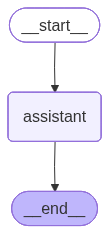

In [7]:
try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")
    print("Graph structure: START -> assistant -> END")

**Running the Agent**

In [8]:
# Defining a session ID for the conversation
session_id = "chat-01"

def run_conversation(user_input: str, thread_id: str = session_id):
    
    result = agent.invoke(
        {"messages": [HumanMessage(content=user_input)]}, 
        config={"configurable": {"thread_id": thread_id}}
    )
    
    # Print the conversation
    for message in result["messages"]:
        if isinstance(message, HumanMessage):
            print(f"\nUser: {message.content}")
        elif isinstance(message, AIMessage):
            print(f"\nAgent: {message.content}")
            
    print("\n" + "~"*70)
    
print("Conversation function is ready!")
        

Conversation function is ready!


In [9]:
run_conversation("Hello! What's your name?")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [10]:
run_conversation("What's my favorite colour?")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

User: What's my favorite colour?

Agent: I don’t have access to personal information, so I’m not sure what your favorite color is. However, I would love to help with anything else you might need. Is there something specific you would like to discuss?

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [11]:
# First message
run_conversation("My favorite color is blue")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

User: What's my favorite colour?

Agent: I don’t have access to personal information, so I’m not sure what your favorite color is. However, I would love to help with anything else you might need. Is there something specific you would like to discuss?

User: My favorite color is blue

Agent: That's a lovely choice! Blue is often associated with calmness and tranquility. Is there anything specific you would like to talk about regarding your favorite color, or is there something else I can assist you with?

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [12]:
run_conversation("What's my favorite colour?")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

User: What's my favorite colour?

Agent: I don’t have access to personal information, so I’m not sure what your favorite color is. However, I would love to help with anything else you might need. Is there something specific you would like to discuss?

User: My favorite color is blue

Agent: That's a lovely choice! Blue is often associated with calmness and tranquility. Is there anything specific you would like to talk about regarding your favorite color, or is there something else I can assist you with?

User: What's my favorite colour?

Agent: You mentioned that your favorite color is blue. If there is anything else you would like to share or discuss, please let me know!

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [13]:
run_conversation("I bought a laptop last week")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

User: What's my favorite colour?

Agent: I don’t have access to personal information, so I’m not sure what your favorite color is. However, I would love to help with anything else you might need. Is there something specific you would like to discuss?

User: My favorite color is blue

Agent: That's a lovely choice! Blue is often associated with calmness and tranquility. Is there anything specific you would like to talk about regarding your favorite color, or is there something else I can assist you with?

User: What's my favorite colour?

Agent: You mentioned that your favorite color is blue. If there is anything else you would like to share or discuss, please let me know!

User: I bought a laptop last week

Agent: That's great to hear! I hope you're enjoying your new laptop. Is there anything specific you would like assistance with regarding your laptop, such as setup, 

In [14]:
run_conversation("It won't turn on")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

User: What's my favorite colour?

Agent: I don’t have access to personal information, so I’m not sure what your favorite color is. However, I would love to help with anything else you might need. Is there something specific you would like to discuss?

User: My favorite color is blue

Agent: That's a lovely choice! Blue is often associated with calmness and tranquility. Is there anything specific you would like to talk about regarding your favorite color, or is there something else I can assist you with?

User: What's my favorite colour?

Agent: You mentioned that your favorite color is blue. If there is anything else you would like to share or discuss, please let me know!

User: I bought a laptop last week

Agent: That's great to hear! I hope you're enjoying your new laptop. Is there anything specific you would like assistance with regarding your laptop, such as setup, 

In [15]:
run_conversation("It won't turn on", thread_id="101")


User: It won't turn on

Agent: I'm sorry to hear that your device isn't turning on. I understand how frustrating that can be. Let’s try a few steps to troubleshoot the issue.

First, please ensure that the device is charged. If it's a battery-operated device, try plugging it into a power source using the original charger. Sometimes, a completely drained battery can take a few minutes to respond.

If it still doesn’t turn on, try holding down the power button for about ten seconds. This can sometimes reset the device.

If these steps don't work, please let me know what type of device you are using, and I will be happy to assist you further.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [16]:
run_conversation("I am using Samsung", thread_id="101")


User: It won't turn on

Agent: I'm sorry to hear that your device isn't turning on. I understand how frustrating that can be. Let’s try a few steps to troubleshoot the issue.

First, please ensure that the device is charged. If it's a battery-operated device, try plugging it into a power source using the original charger. Sometimes, a completely drained battery can take a few minutes to respond.

If it still doesn’t turn on, try holding down the power button for about ten seconds. This can sometimes reset the device.

If these steps don't work, please let me know what type of device you are using, and I will be happy to assist you further.

User: I am using Samsung

Agent: Thank you for the information. If your Samsung device isn't turning on, here are a few additional steps you can try:

1. **Force Restart**: Press and hold the power button and the volume down button simultaneously for about ten seconds. This can help reset the device.

2. **Charge it Again**: Ensure you are using a 

In [17]:
run_conversation("It won't turn on still")


User: Hello! What's your name?

Agent: Hello! I am EaseIt, your customer support agent. How can I assist you today?

User: What's my favorite colour?

Agent: I don’t have access to personal information, so I’m not sure what your favorite color is. However, I would love to help with anything else you might need. Is there something specific you would like to discuss?

User: My favorite color is blue

Agent: That's a lovely choice! Blue is often associated with calmness and tranquility. Is there anything specific you would like to talk about regarding your favorite color, or is there something else I can assist you with?

User: What's my favorite colour?

Agent: You mentioned that your favorite color is blue. If there is anything else you would like to share or discuss, please let me know!

User: I bought a laptop last week

Agent: That's great to hear! I hope you're enjoying your new laptop. Is there anything specific you would like assistance with regarding your laptop, such as setup, 